In [67]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 


# Load data in X 
X = pd.read_csv('dataset.txt',header=None)
X.describe()


0           1
count  750.000000  750.000000
mean     0.327286   -0.343637
std      1.038473    1.028660
min     -2.033119   -2.218457
25%     -0.805860   -1.142937
50%      0.730641   -0.764607
75%      1.135494    0.738344
max      2.268390    1.964981

In [68]:
#Perform the DBSCAN Clustering on the data X
db = DBSCAN(eps=0.3, min_samples=10).fit(X) 
labels=db.labels_
labels


array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0, -1,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2, -1,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [69]:
db.core_sample_indices_

array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,
        15,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  33,  34,  35,  36,  37,  38,  40,  41,  42,  43,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  77,  78,  79,  80,  81,  83,  84,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 106, 107, 109, 111, 112, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145, 147,
       148, 150, 151, 152, 153, 155, 157, 159, 160, 162, 163, 164, 166,
       168, 169, 170, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 20

In [70]:
from sklearn import metrics
#zeros_like creates a zeros array using the shape of input data
sample_cores = np.zeros_like(db.labels_, dtype=bool) 

#Make all the samples that are not noise as true
sample_cores[db.core_sample_indices_]=True
sample_cores

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [71]:

# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

print(n_clusters_) 


3


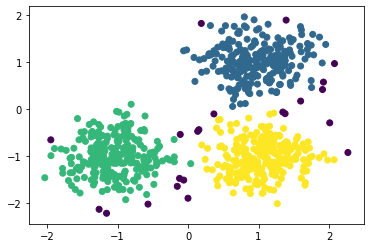

In [72]:

# Plot result 
import matplotlib.pyplot as plt 
%matplotlib inline

# Black removed and is used for noise instead. 
unique_labels = set(labels) 
unique_labels

fig,ax=plt.subplots()
ax.scatter(X.iloc[:,0],X.iloc[:,1],c=labels)

In [63]:

colors = ['y', 'b', 'g', 'r'] 
print(colors) 

['y', 'b', 'g', 'r']


In [64]:
list(zip(unique_labels, colors))

[(0, 'y'), (1, 'b'), (2, 'g'), (-1, 'r')]

In [65]:
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0, -1,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2, -1,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2